# Pyber Challenge

# Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
# data files to Load
city_data_to_load = os.path.join("Resources", "city_data.csv")
ride_data_to_load = os.path.join("Resources", "ride_data.csv")

# Read Data Files and Store them in a Pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Data Cleaning

In [3]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [4]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [5]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [8]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [9]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

### Merge the DataFrames

In [10]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [11]:
#  1. Get the total rides for each city type
total_rides_by_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [12]:
# 2. Get the total drivers for each city type
total_drivers_by_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [13]:
#  3. Get the total amount of fares for each city type
total_fares_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [14]:
#  4. Get the average fare per ride for each city type. 
avgfares_perride_by_city_type = total_fares_by_city_type / total_rides_by_city_type
avgfares_perride_by_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [15]:
avgfare_perdriver_by_city_type = total_fares_by_city_type / total_drivers_by_city_type
avgfare_perdriver_by_city_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

# Remove the Index Name

In [16]:
total_rides_by_city_type.index.name = None
total_rides_by_city_type

Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [17]:
total_drivers_by_city_type.index.name = None
total_drivers_by_city_type

Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [18]:
total_fares_by_city_type.index.name = None
total_fares_by_city_type

Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

# Build the PyBer Summary DataFrame

In [19]:
#  6. Create a PyBer summary DataFrame. 
pyber_ride_summary_df = pd.DataFrame({
    "Total Rides": total_rides_by_city_type,
    "Total Drivers": total_drivers_by_city_type,
    "Total Fares": total_fares_by_city_type,
    "Average Fare per Ride": avgfares_perride_by_city_type,
    "Average Fare per Driver": avgfare_perdriver_by_city_type})

pyber_ride_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [20]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_ride_summary_df.index.name = None
pyber_ride_summary_df.dtypes

Total Rides                  int64
Total Drivers                int64
Total Fares                float64
Average Fare per Ride      float64
Average Fare per Driver    float64
dtype: object

In [21]:
#  8. Format the columns.
pyber_ride_summary_df["Total Rides"] = pyber_ride_summary_df["Total Rides"].map("{:,}".format)
pyber_ride_summary_df["Total Drivers"] = pyber_ride_summary_df["Total Drivers"].map("{:,}".format)
pyber_ride_summary_df["Total Fares"] = pyber_ride_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_ride_summary_df["Average Fare per Ride"] = pyber_ride_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_ride_summary_df["Average Fare per Driver"] = pyber_ride_summary_df["Average Fare per Driver"].map("${:.2f}".format)

# Display the data frame
pyber_ride_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [22]:
# Rename the Columns in the PyBer Data DataFrame
pyber_data_df = pyber_data_df.rename(columns =
                                     {"city": "City",
                                     "date": "Date", 
                                     "fare": "Fare", 
                                     "ride_id": "Ride Id",
                                     "driver_count": "No. Drivers",
                                     "type": "City Type"})

pyber_data_df.head(10)

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [23]:
pyber_data_df.set_index(pyber_data_df["Date"], inplace=True)
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         2375 non-null   object 
 1   Date         2375 non-null   object 
 2   Fare         2375 non-null   float64
 3   Ride Id      2375 non-null   int64  
 4   No. Drivers  2375 non-null   int64  
 5   City Type    2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [24]:
# Create a new DataFrame for Fares and include only the Date, City Type, and Fare Columns using the copy()method on the merged DataFrame.
pyber_cities_fares = pyber_data_df[["Date", "City Type", "Fare"]].copy()
pyber_cities_fares.head(10)

,Date,City Type,Fare
Date,,,
2019-01-14 10:14:22,2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,2019-03-06 04:28:35,Urban,34.58
2019-03-11 12:26:48,2019-03-11 12:26:48,Urban,9.52
2019-02-27 11:17:56,2019-02-27 11:17:56,Urban,43.25
2019-04-26 00:43:24,2019-04-26 00:43:24,Urban,35.98
2019-01-08 03:28:48,2019-01-08 03:28:48,Urban,35.09


In [25]:
# Drop the extra Date Column.
pyber_cities_fares.drop(["Date"], axis=1, inplace=True)
pyber_cities_fares.head(10)

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
2019-03-11 12:26:48,Urban,9.52
2019-02-27 11:17:56,Urban,43.25
2019-04-26 00:43:24,Urban,35.98
2019-01-08 03:28:48,Urban,35.09


In [26]:
# set the Index to the Datetime Data Type.
pyber_cities_fares.index = pd.to_datetime(pyber_data_df.index)
pyber_cities_fares.head(10)

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
2019-03-11 12:26:48,Urban,9.52
2019-02-27 11:17:56,Urban,43.25
2019-04-26 00:43:24,Urban,35.98
2019-01-08 03:28:48,Urban,35.09


In [27]:
# DataFrame using the info()
pyber_cities_fares.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [28]:
# Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_fares = pyber_cities_fares.groupby(["City Type", "Date"]).sum()["Fare"]
sum_fares

City Type  Date               
Rural      2019-01-01 09:45:36    43.69
           2019-01-02 11:18:32    52.12
           2019-01-03 19:51:01    19.90
           2019-01-04 03:31:26    24.88
           2019-01-06 07:38:40    47.33
                                  ...  
Urban      2019-05-08 04:20:00    21.99
           2019-05-08 04:39:49    18.45
           2019-05-08 07:29:01    18.55
           2019-05-08 11:38:35    19.77
           2019-05-08 13:10:18    18.04
Name: Fare, Length: 2375, dtype: float64

In [29]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
sum_fares_df = pd.DataFrame(sum_fares)
sum_fares_df

Fare
City Type Date                      
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:49  18.45
          2019-05-08 07:29:01  18.55
          2019-05-08 11:38:35  19.77
          2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [30]:
# Reset the Index
sum_fares_df = sum_fares_df.reset_index()
sum_fares_df.head(10)

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
5,Rural,2019-01-08 06:19:45,19.39
6,Rural,2019-01-09 15:30:35,31.84
7,Rural,2019-01-11 04:39:27,16.42
8,Rural,2019-01-14 07:09:17,18.05
9,Rural,2019-01-14 15:58:48,54.10


In [31]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
sum_fares_pivot = sum_fares_df.pivot(index="Date", columns="City Type", values="Fare")
sum_fares_pivot.head(10)

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [32]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fares_Jan_April = sum_fares_pivot.loc['2019-01-01':'2019-04-28']
fares_Jan_April.head(10)

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [33]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
fares_Jan_April.index = pd.to_datetime(fares_Jan_April.index)
fares_Jan_April

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [34]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_Jan_April.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [35]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_df = fares_Jan_April.resample("W").sum()
weekly_fares_df.head(10)

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


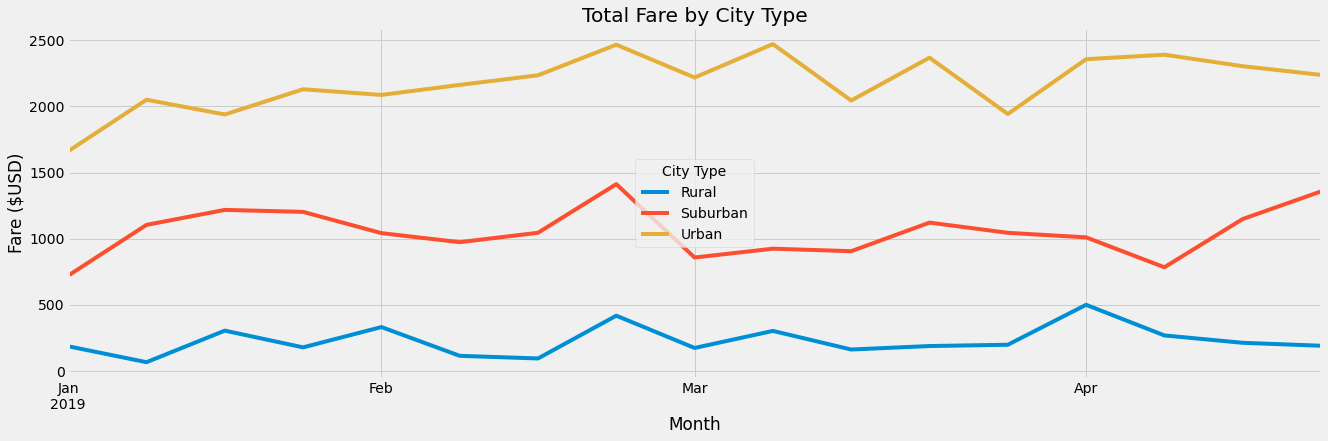

In [36]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

ax = weekly_fares_df.plot(figsize = (20,6))
# Add a title 
ax.set_title("Total Fare by City Type")
#  Add a x- and y-axis label.
ax.set_xlabel("Month")
ax.set_ylabel("Fare ($USD)")
plt.savefig("analysis/Challenge_fare_summary.png")
plt.show()